# Activation Functions 

Notes:

1. Introducing non linearity to the network. Why?
2. According to me we need one parameter to compare all the nodes results after learning and passing the value to upcoming nodes.
3. To make sense of the data and a mapping for approximation.
4. Understand what is the impact of weights and biases changing value to the network/nodes.
    If there is only linear fx then it can only fit linear data but if we have not linear data like a sine wave then it will fail to do so. 
5. If there is no activate function then the whole network will be similar to a one linear node.

$w^T(w^T (w^T  x + b) + b) + b ... = output$ 

<img src='diags/activation&DenseLayer1.drawio.svg'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid

$f(x) = \frac{1}{(1 + e^{-x})}$

* granular
* between 0 and 1
* Comparatively complex calcultaion


In [3]:
class ActivationSigmoid:
    """Sigmoid Activation Fx
    """   
    def forward(self, inputs):
        """Apply Sigmoid to input
        """
        self.output = 1 / (1 + np.exp(-inputs))

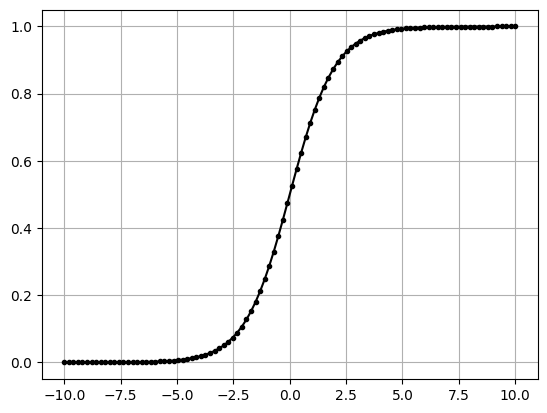

In [4]:
data = np.linspace(-10, 10, 100)
act = ActivationSigmoid()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Stepwise

$f(x) = 0$  | if $x \leq 0$

$f(x) = 1$  | if $x \gt 0$

* non granular 
* only 0 and 1

In [5]:
class ActivationStepwise:
    """Stepwise Activation Fx
    """
    def forward(self, inputs):
        """Apply Stepwise to inputs

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs 
        self.output = (inputs > 0).astype('int') # calculate from inputs

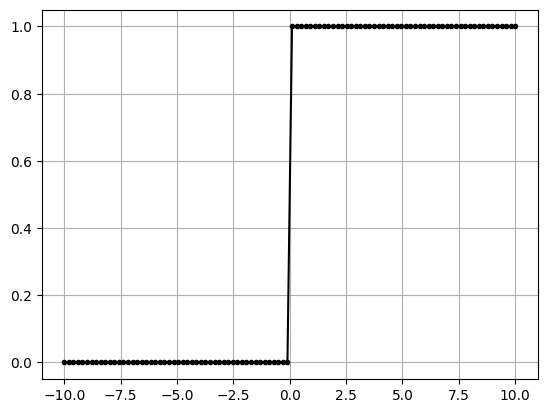

In [6]:
data = np.linspace(-10, 10, 100)
act = ActivationStepwise()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Relu


$f(x) = 0$  | if $x \leq 0$

$f(x) = x$  | if $x \gt 0$

* granular
* between 0 to x
* easy calculation 
* almost linear but rectified so less than zeros are not allowed.so introducing slight non linearity makes it eligible for an activation function but also inherently easy and fast calculation than sigmoid.

In [7]:
class ActivationReLU:
    """ReLU Activation Fx
    """
    
    def forward(self, inputs):
        """Apply ReLU to input
        
        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs 
        self.output = np.maximum(0, inputs) # calculate from inputs

    def backward(self, dvalues):
        """Apply backward propogation

        Args:
            dvalues (numpy.ndarray) : inputs from previous later in backward prop
        """
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

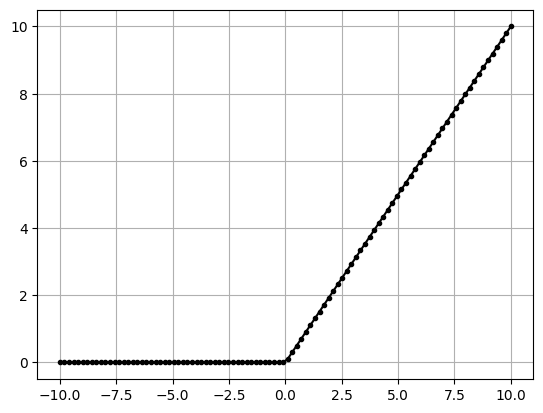

In [8]:
data = np.linspace(-10, 10, 100)
act = ActivationReLU()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Leaky Relu


$f(x) = 0.01x$  | if $x \leq 0$

$f(x) = x$  | if $x \gt 0$

In [9]:
class ActivationLeakyReLU:
    """ReLU Activation Fx
    """
    
    def forward(self, inputs):
        """Apply Leaky ReLU to input
        
        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs 
        self.output = np.where(inputs > 0,inputs,0.01 * inputs)

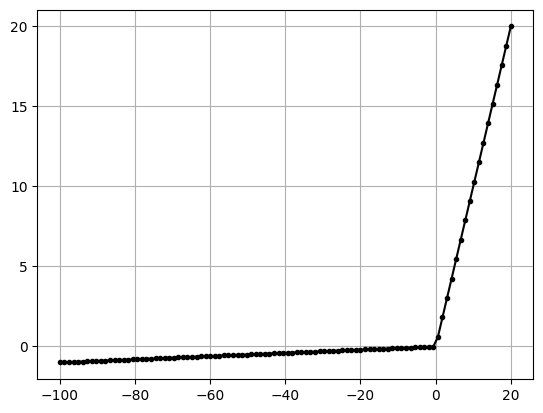

In [10]:
data = np.linspace(-100, 20, 100)
act = ActivationLeakyReLU()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Softplus

`smooth ReLU function`

\begin{align}
    f(x) &= \log{(1 + \exp(x))}
\end{align}

In [11]:
class Softplus:
    def forward(self, inputs):
        """Apply Leaky ReLU to input

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs
        self.output = np.log(1 + np.exp(self.inputs))

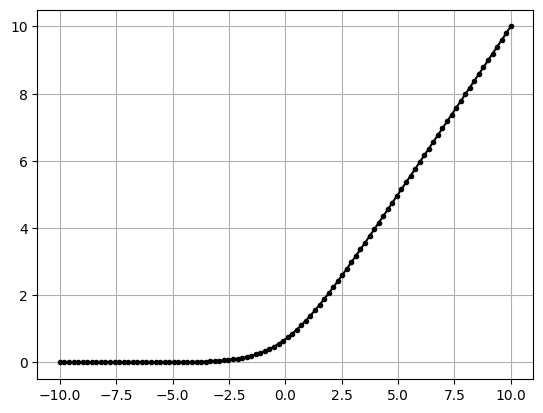

In [12]:
data = np.linspace(-10, 10, 100)
act = Softplus()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Hyperbolic Tangent(Tanh)

\begin{align}
    f(x) &= Tanh(x)\\
         &= \frac{2}{1 + e^{-2x}} - 1\\
         &= \frac{1 - e^{-2x}}{1 + e^{-2x}}\\
         &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

In [13]:
class ActivationTanh:
    
    def forward(self, inputs):
        """Apply Leaky ReLU to input
        
        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs
        
#         # scratch
#         ez = np.exp(inputs)
#         e_z = np.exp(-inputs)
#         self.output = (ez - e_z)/(ez + e_z)

        self.output = np.tanh(inputs)

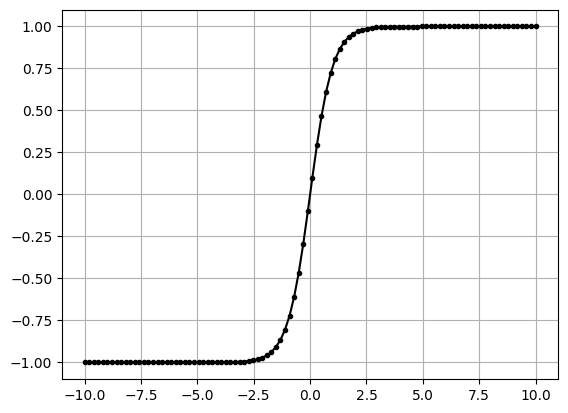

In [14]:
data = np.linspace(-10, 10, 100)
act = ActivationTanh()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Softmax


To convert into probabilities

\begin{align*}
    \sigma(\mathbf{z})_i &= \frac{e^{z_i}}{\sum_{j=1}^m e^{z_j}} 
    \\ 
    \\ 
    & \text{ for } i = 1, \dotsc , m \text{ and } \mathbf z =(z_1,\dotsc,z_m) \in R^m\\
    \\
    \sigma	&= 	\text{softmax}\\
    \vec{z}	&= 	\text{input vector}\\
    e^{z_{i}}	&= 	\text{standard exponential function for input vector}\\
    K	&= 	\text{number of classes in the multi-class classifier}\\
    e^{z_{j}}	&= 	\text{standard exponential function for output vector}\\
\end{align*}

here z is actually z = x - x.max(). because exponential values increase really fast. and that can cause out of memory error.
so we can't use x directly.

when x - x.max() is done then the  largest value is 0. so values will not blow out.

In [15]:
np.exp(1000) # like this

/tmp/ipykernel_7483/3964567.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000) # like this


np.float64(inf)

In [16]:
class ActivationSoftmax:

    def forward(self, inputs):
        """Forward propogation calculation

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        exp_values = np.exp(inputs - inputs.max(axis=1, keepdims=True))
        probabilites = exp_values / exp_values.sum(axis=1, keepdims=True)
        self.output = probabilites

Equal Opportunity Probability

In [18]:
act = ActivationSoftmax()
act.forward(np.array([[1, 1, 1, 1]]))
act.output

array([[0.25, 0.25, 0.25, 0.25]])

In [19]:
act = ActivationSoftmax()
act.forward(np.array([[1, 2, 2, 1]]))
act.output

array([[0.13447071, 0.36552929, 0.36552929, 0.13447071]])

In [20]:
data = np.linspace(-10,100,100).reshape(1,100) #(1,100)

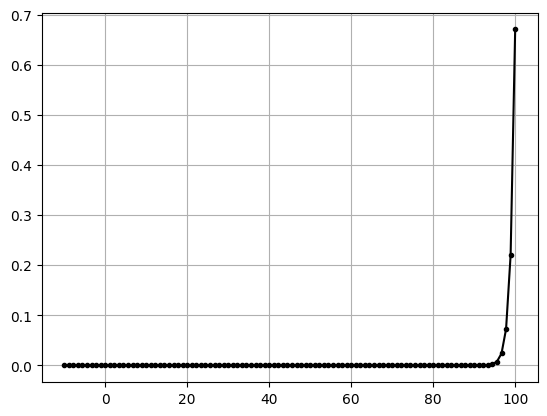

In [21]:
t_exp = np.exp(data)
t_prob = t_exp / np.sum(t_exp, axis=1, keepdims=True)
plt.plot(data[0],t_prob[0],'k.-')
plt.grid()

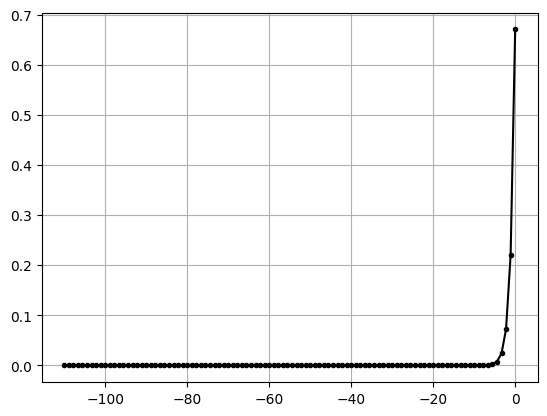

In [22]:
act = ActivationSoftmax()
act.forward(data)

plt.plot((data - data.max(axis=1, keepdims=True))[0],act.output[0],'k.-')
plt.grid()

## Gaussian

\begin{align}
    f(x) = exp(-x^2)
\end{align}

In [23]:
class ActivationGaussian:

    def forward(self, inputs):
        """Forward propogation calculation

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.output = np.exp(-(inputs**2))

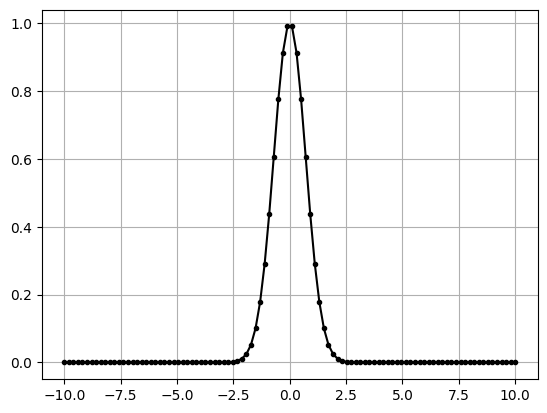

In [24]:
data = np.linspace(-10, 10, 100)
act = ActivationGaussian()
act.forward(data)

plt.plot(data,act.output,'k.-')
plt.grid()